In [5]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

seed = 3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_gbr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',RFR())])
pipe_KR = Pipeline([('scl', MinMaxScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]


min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_ridge, 
       pipe_gbr, pipe_rfr, pipe_KR]
params = [grid_params_linear, grid_params_lasso,
         grid_params_ridge, grid_params_gbr,
         grid_params_rfr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'Ridge' ,
    3: "GradientDescentRegressor" ,
    4: "RandomForestRegressor" ,
    5: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    4.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    1.6s finished
C:\Users\ICT01_13\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336.5307357610477, tolerance: 179.88506747158257
  positive)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 2536 tasks      | elapsed:    2.1s
[Parallel(n_jobs=20)]: Done 4500 out of 4500 | elapsed:    3.2s finished
[Parallel(n_job

finish


[Parallel(n_jobs=20)]: Done 120 out of 120 | elapsed:    0.2s finished
C:\Users\ICT01_13\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:    0.0s finished


<function matplotlib.pyplot.show(*args, **kw)>

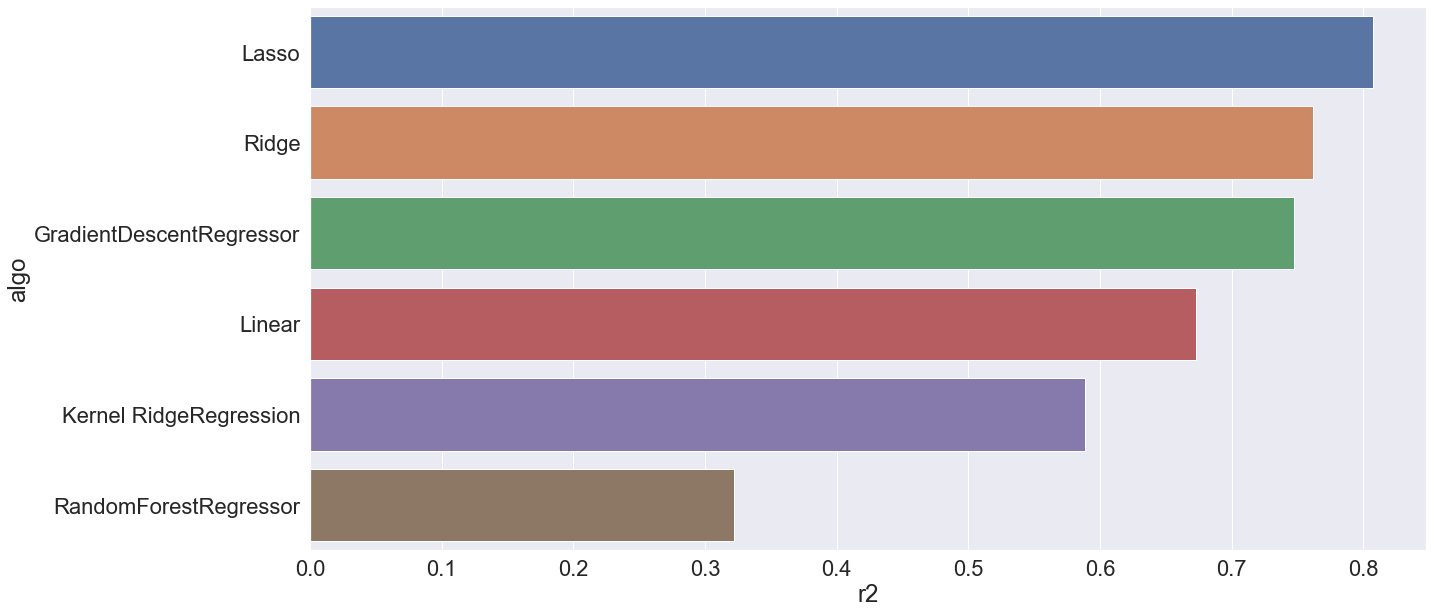

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show

# 개망함.......